In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
df = pd.read_csv('./data/unavailability_of_generation_units.csv')
df.head()

,Unnamed: 0,avail_qty,biddingzone_domain,businesstype,curvetype,docstatus,end,mrid,nominal_power,plant_type,production_resource_id,production_resource_location,production_resource_name,production_resource_psr_name,pstn,qty_uom,resolution,revision,start
0,2020-05-28 15:30:08+02:00,0.0,CH,Planned maintenance,A03,Cancelled,2023-12-31 23:45:00+01:00,_FNggndgzdIQ5cnQEo1kow,162.0,Hydro Water Reservoir,12W-0000000925-8,intra_zonal,Maggia (OFIMA),Centrale di Bavona,1,MAW,PT15M,2,2023-12-02 00:00:00+01:00
1,2021-02-08 10:14:45+01:00,121.0,CH,Planned maintenance,A03,Cancelled,2024-02-01 00:00:00+01:00,6EtaO7QGseRN4_bBLpvwcw,226.0,Hydro Water Reservoir,12W-0000000064-3,intra_zonal,AET Leventina,AET Leventina,1,MAW,PT15M,2,2024-01-03 00:00:00+01:00
2,2021-02-25 10:30:24+01:00,1201.0,CH,Planned maintenance,A03,Cancelled,2024-03-11 00:00:00+01:00,7YWRqOJEj68soGano7GHEg,1307.0,Hydro Pumped Storage,12W-0000000031-O,intra_zonal,KW Oberhasli AG (KWO),KWO Produktion,1,MAW,PT15M,2,2024-03-04 07:00:00+01:00
3,2021-03-03 09:32:08+01:00,762.0,CH,Planned maintenance,A03,Cancelled,2024-01-19 18:00:00+01:00,6oD12ZjjFz8Ng1qza1yfFw,930.0,Hydro Pumped Storage,12W-0000000241-A,intra_zonal,Nant de Drance (NDD),Usine de Nant de Drance,1,MAW,PT15M,2,2024-01-08 06:00:00+01:00
4,2021-03-10 14:49:11+01:00,0.0,CH,Planned maintenance,A03,Cancelled,2024-01-01 00:00:00+01:00,Fa8ESmXbef7-UkoHnrAqVw,105.0,Hydro Pumped Storage,12W-0000000917-6,intra_zonal,KSL - KW Sarganserland AG,Mapragg - Gigerwald G3,1,MAW,PT15M,2,2023-11-09 00:00:00+01:00


In [ ]:
# drop Unnamed: 0 column
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
# convert end and start to datetime
df['end'] = pd.to_datetime(df['end'])
df['start'] = pd.to_datetime(df['start'])

C:\Users\FlavioMüller\AppData\Local\Temp\ipykernel_103056\3520792729.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['end'] = pd.to_datetime(df['end'])
C:\Users\FlavioMüller\AppData\Local\Temp\ipykernel_103056\3520792729.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['start'] = pd.to_datetime(df['start'])


In [ ]:
# calculate duration in minutes
df['duration'] = (df['end'] - df['start'])
df['duration_minutes'] = pd.to_timedelta(df['duration']).dt.total_seconds() / 60

In [20]:
df['unavail_qty'] = df['nominal_power'] - df['avail_qty']

In [21]:
df.head()

,avail_qty,biddingzone_domain,businesstype,curvetype,docstatus,end,mrid,nominal_power,plant_type,production_resource_id,...,production_resource_name,production_resource_psr_name,pstn,qty_uom,resolution,revision,start,duration,duration_minutes,unavail_qty
0,0.0,CH,Planned maintenance,A03,Cancelled,2023-12-31 23:45:00+01:00,_FNggndgzdIQ5cnQEo1kow,162.0,Hydro Water Reservoir,12W-0000000925-8,...,Maggia (OFIMA),Centrale di Bavona,1,MAW,PT15M,2,2023-12-02 00:00:00+01:00,29 days 23:45:00,43185.0,162.0
1,121.0,CH,Planned maintenance,A03,Cancelled,2024-02-01 00:00:00+01:00,6EtaO7QGseRN4_bBLpvwcw,226.0,Hydro Water Reservoir,12W-0000000064-3,...,AET Leventina,AET Leventina,1,MAW,PT15M,2,2024-01-03 00:00:00+01:00,29 days 00:00:00,41760.0,105.0
2,1201.0,CH,Planned maintenance,A03,Cancelled,2024-03-11 00:00:00+01:00,7YWRqOJEj68soGano7GHEg,1307.0,Hydro Pumped Storage,12W-0000000031-O,...,KW Oberhasli AG (KWO),KWO Produktion,1,MAW,PT15M,2,2024-03-04 07:00:00+01:00,6 days 17:00:00,9660.0,106.0
3,762.0,CH,Planned maintenance,A03,Cancelled,2024-01-19 18:00:00+01:00,6oD12ZjjFz8Ng1qza1yfFw,930.0,Hydro Pumped Storage,12W-0000000241-A,...,Nant de Drance (NDD),Usine de Nant de Drance,1,MAW,PT15M,2,2024-01-08 06:00:00+01:00,11 days 12:00:00,16560.0,168.0
4,0.0,CH,Planned maintenance,A03,Cancelled,2024-01-01 00:00:00+01:00,Fa8ESmXbef7-UkoHnrAqVw,105.0,Hydro Pumped Storage,12W-0000000917-6,...,KSL - KW Sarganserland AG,Mapragg - Gigerwald G3,1,MAW,PT15M,2,2023-11-09 00:00:00+01:00,53 days 00:00:00,76320.0,105.0


In [22]:
len(df)

1048

In [ ]:
# min and max start date
df['start'].min(), df['start'].max()

(Timestamp('2023-04-17 07:00:00+0200', tz='UTC+02:00'),
 Timestamp('2024-09-10 23:00:00+0200', tz='UTC+02:00'))

In [ ]:
# nbr of uniqe production_resource_id
df['production_resource_id'].nunique()

19

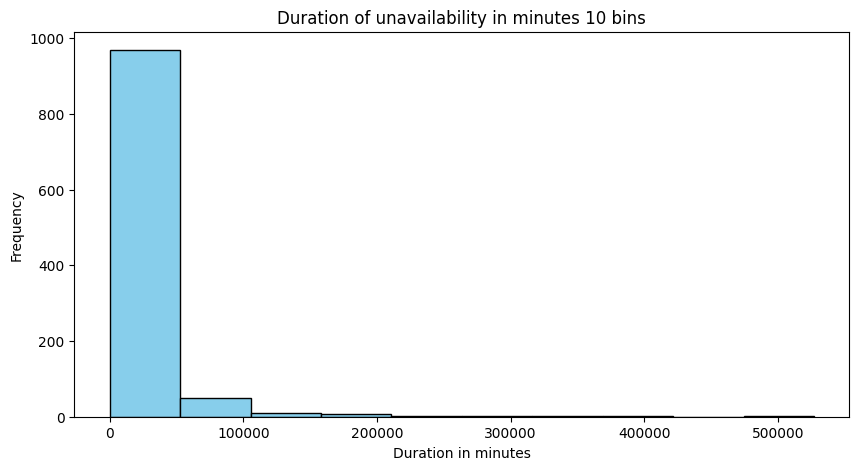

In [39]:
# plot 2 histograms with the duration of the unavailability with 2 different bin sizes
plt.figure(figsize=(10, 5))
plt.hist(df['duration_minutes'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title('Duration of unavailability in minutes 10 bins')
plt.show()


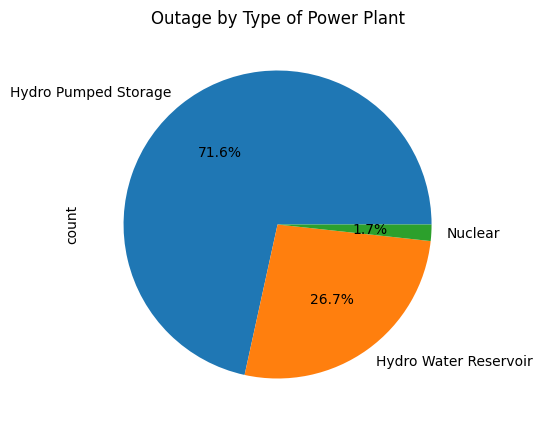

In [49]:
# plot pie chart with the type of unavailability
plt.figure(figsize=(10, 5))
df['plant_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outage by Type of Power Plant')
plt.show()


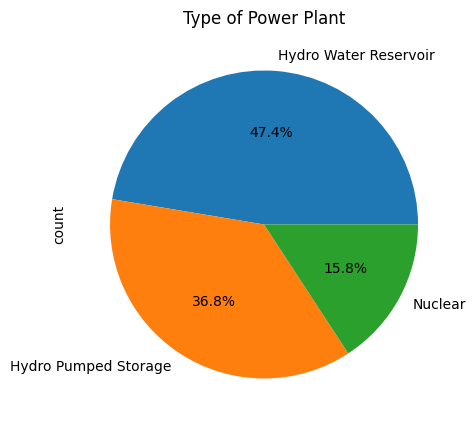

In [47]:
# group by production_resource_id and plot pie chart of plant_type
df_grouped = df.groupby('production_resource_id').first()
plt.figure(figsize=(10, 5))
df_grouped['plant_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Type of Power Plant')
plt.show()

In [63]:
# add a column with the quarter of the year
df['quarter'] = pd.to_datetime(df['start'], utc=True).dt.quarter

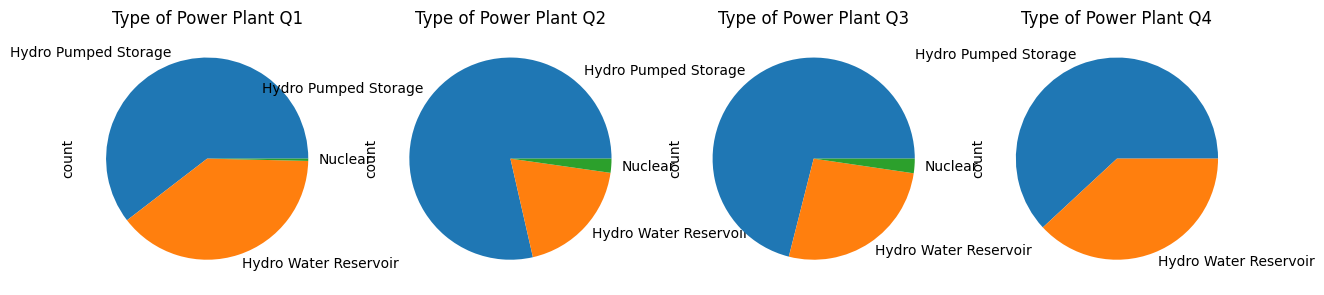

In [ ]:
# Filter data for each quarter
df_q1 = df[df['quarter'] == 1]
df_q2 = df[df['quarter'] == 2]
df_q3 = df[df['quarter'] == 3]
df_q4 = df[df['quarter'] == 4]

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Plot pie charts
df_q1['plant_type'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Type of Power Plant Q1')

df_q2['plant_type'].value_counts().plot.pie(ax=ax[1])
ax[1].set_title('Type of Power Plant Q2')

df_q3['plant_type'].value_counts().plot.pie(ax=ax[2])
ax[2].set_title('Type of Power Plant Q3')

df_q4['plant_type'].value_counts().plot.pie(ax=ax[3])
ax[3].set_title('Type of Power Plant Q4')

plt.show()


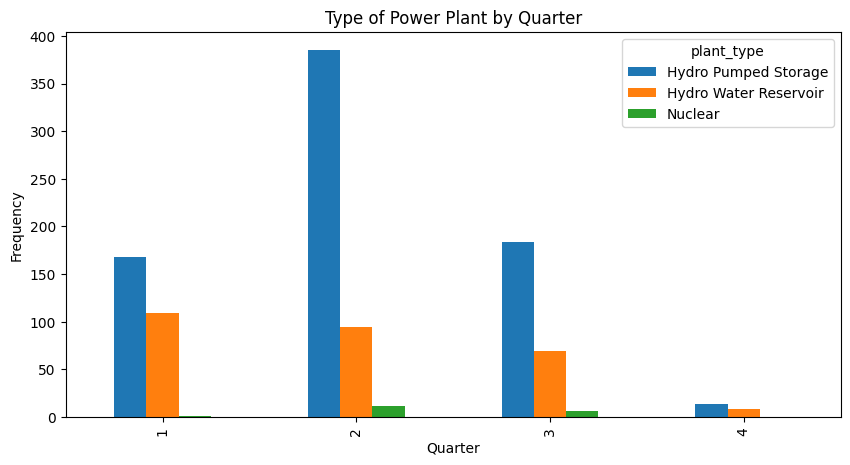

In [74]:
# plot all quarters as a grouped bar chart
df_grouped = df.groupby(['quarter', 'plant_type']).size().unstack()
df_grouped.plot(kind='bar', figsize=(10, 5))
plt.title('Type of Power Plant by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Frequency')
plt.show()

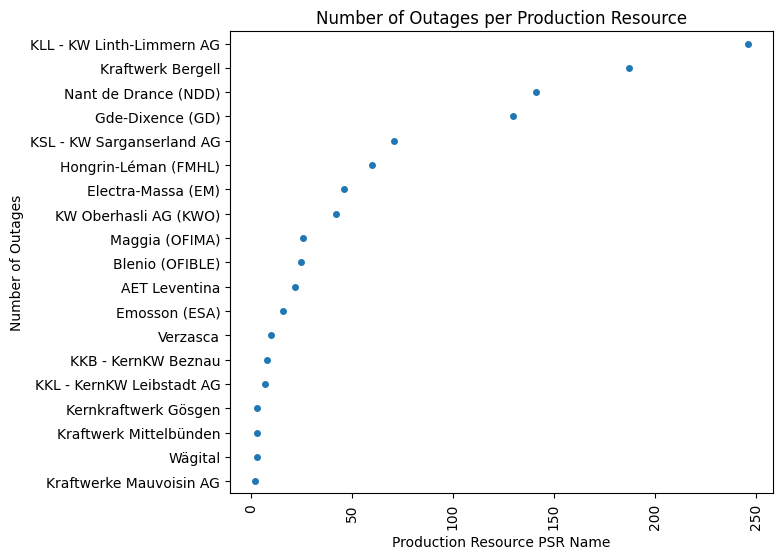

In [83]:
# dotplot (stripplot) with number of outages per production_resource_psr_name

grouped_df = df.groupby('production_resource_name').size().reset_index(name='count')

# sort by count
grouped_df = grouped_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(7, 6))
sns.stripplot(data=grouped_df, y='production_resource_name', x='count')
plt.title('Number of Outages per Production Resource')
plt.xlabel('Production Resource PSR Name')
plt.ylabel('Number of Outages')
plt.xticks(rotation=90)
plt.show()
